# Importing and Loading the data from Kaggle

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#importing scikit-learn libraries for preprocessing, model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, Normalizer,LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import ttest_ind, chi2_contingency, f_oneway,spearmanr, pearsonr
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA

#importing profile report for data analysis
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [4]:
#importing the data
df = pd.read_csv('/content/data.csv')

# Exploratory data analysis

(614, 13)
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480

<Axes: xlabel='Loan_Status', ylabel='count'>

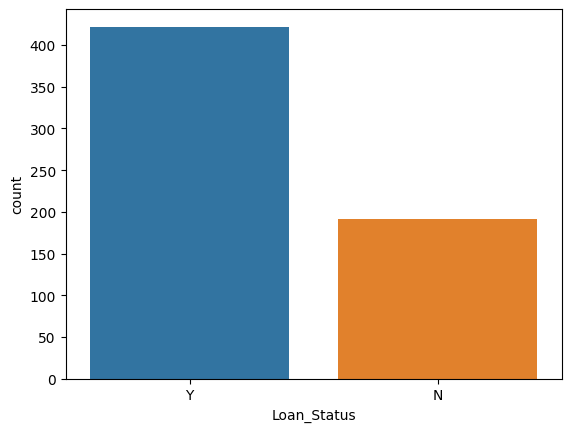

In [5]:
#describing data
print(df.shape)
print(df.isnull().sum())
print(df.describe())
print(df['Loan_Status'].value_counts())
sns.countplot(x='Loan_Status', data=df)

In [6]:
#creating a profile report
profile = ProfileReport(df, title = "Data", explorative = True)
profile.to_notebook_iframe()
profile.to_file("Data.pdf")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:360: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
px.histogram(df, x = 'Gender',
             title = ' Gender vs Loan Status',
             color =  'Loan_Status')

In [8]:
px.histogram(df, x = 'Married',
             title = 'Married vs Loan Status',
             color =  'Loan_Status')

In [9]:
px.histogram(df, x = 'Dependents',
             title = 'Dependents vs Loan Status',
             color =  'Loan_Status')

In [10]:
px.histogram(df, x = 'Education',
             title = 'Education vs Loan Status',
             color =  'Loan_Status')

In [11]:
px.histogram(df, x = 'Self_Employed',
             title = 'Self_Employed vs Loan Status',
             color =  'Loan_Status')

In [12]:
px.scatter(df, x = 'ApplicantIncome',
             title = 'Applicant Income vs Loan Status',
             color =  'Loan_Status')

In [13]:
px.histogram(df, x = 'CoapplicantIncome',
             title = 'coapplicant Income vs Loan Status',
             color =  'Loan_Status')

In [14]:
px.histogram(df, x = 'LoanAmount',
             title = 'Loan Amount vs Loan Status',
             color =  'Loan_Status')

In [15]:
px.histogram(df, x = 'Loan_Amount_Term',
             title = 'Loan Amount Term vs Loan Status',
             color =  'Loan_Status')

In [16]:
px.histogram(df, x = 'Credit_History',
             title = 'Credit History vs Loan Status',
             color =  'Loan_Status')

In [17]:
px.histogram(df, x = 'Property_Area',
             title = 'Property Area vs Loan Status',
             color =  'Loan_Status')

Text(0.5, 1.0, 'Loan Amount vs Income')

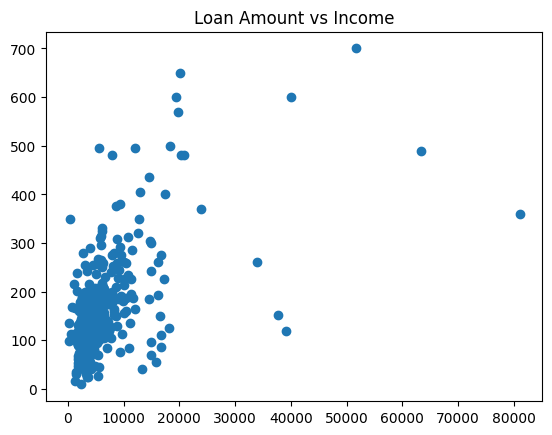

In [18]:
plt.scatter(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Loan Amount vs Income')

Correlation Matrix


<ipython-input-19-97cdbb94fb9a>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

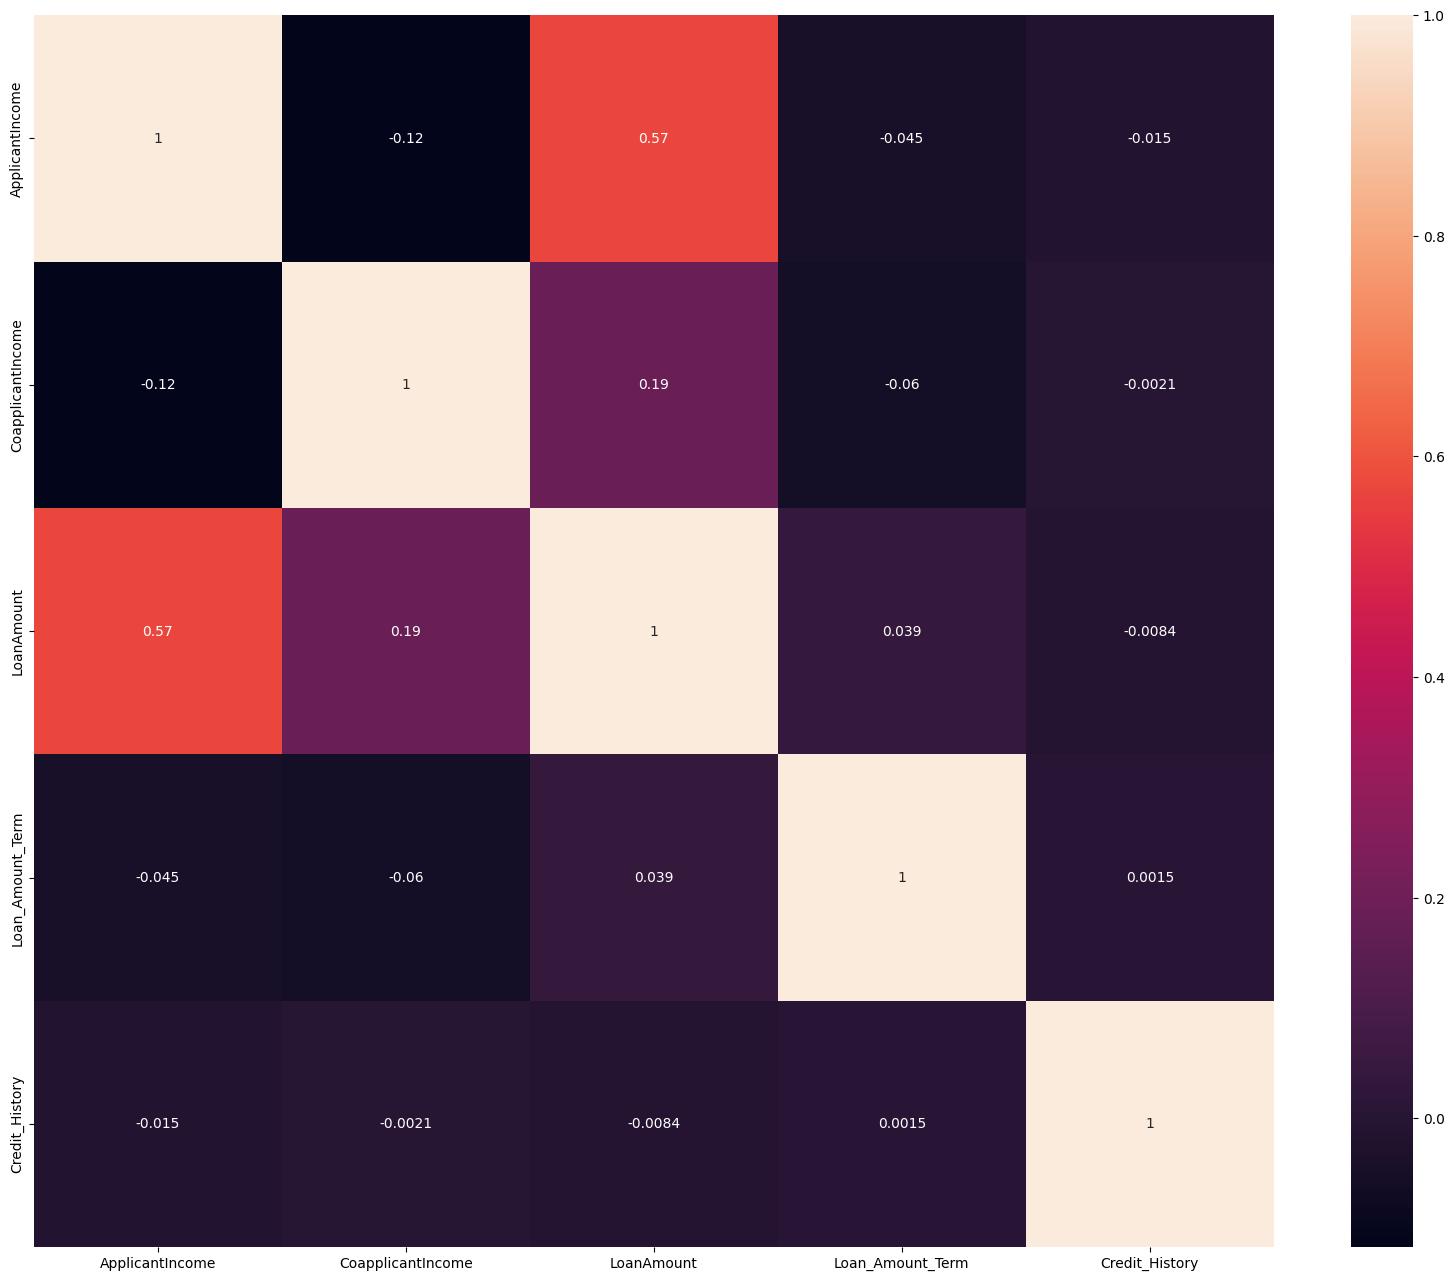

In [19]:
#heatmap to show correlation
import seaborn as sb
cor= df.corr()
plt.figure(figsize=(20,16))
sb.heatmap(cor,annot=True)

# Data Pre-processing



In [20]:
#printing missing value
missing_val = (df.isnull().sum())
print(missing_val[missing_val > 0])

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


Feature encoding


In [21]:
# columns to encode
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

#create LabelEncoder object
le = LabelEncoder()

#encode columns
for col in cols:
    df[col] = le.fit_transform(df[col])


Handling Null Values


In [22]:
# Identify missing Credit_History rows
missing_credit = df[df['Credit_History'].isnull()]

# Create boolean mask for imputation
mask = df['Loan_Status']=='N'

# Update Credit_History column
df.loc[missing_credit.index, 'Credit_History'] = np.where(mask[missing_credit.index], 0, 1)

# Columns to impute using mode
impute_mode = ['Dependents', 'Married', 'Gender']

# Columns to impute using median
impute_median = ['LoanAmount', 'Loan_Amount_Term']

for col in impute_mode:
  # Impute using mode
  val = df[col].mode()[0]
  df[col].fillna(val, inplace=True)

for col in impute_median:
  # Impute using median
  val = df[col].median()
  df[col].fillna(val, inplace=True)



Removed Outliers

In [23]:
#identifying and removing outliers
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - np.mean(df)) / np.std(df))
    outliers = z_scores > threshold
    df = df[~outliers]
    return df
df = remove_outliers_zscore(df)
df


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0.0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0.0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1.0,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0.0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0.0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0.0,2900.0,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0.0,4106.0,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0.0,8072.0,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0.0,7583.0,0.0,187.0,360.0,1.0,2,1


Feature Selection

In [25]:
# Chi-square test
cat_features = ['Gender', 'Married', 'Education', 'Property_Area', 'Self_Employed']
for feature in cat_features:
    ct = pd.crosstab(df[feature], df['Loan_Status'])
    chi2, p, dof, ex = chi2_contingency(ct)
    if p < 0.05:
        print(feature, " is a relevant feature")

num_features = ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'CoapplicantIncome', 'Loan_Amount_Term']

for feature in num_features:
    spearman_corr, p_value = spearmanr(df[feature], df['Loan_Status'])
    if p_value < 0.03:
        print(feature, 'is a relevant feature')

# ANOVA F-test
f, p = f_oneway(df['Dependents'], df['Loan_Status'])
if p < 0.05:
   print("Dependents is a relevant feature")



Married  is a relevant feature
Education  is a relevant feature
Property_Area  is a relevant feature
Credit_History is a relevant feature
Dependents is a relevant feature


In [26]:
columns = ['Married', 'Education', 'Property_Area', 'Credit_History', 'Dependents', 'ApplicantIncome', 'Loan_Status', 'Loan_Amount_Term']
df = df[columns]

splitting Data

In [27]:
X = df.drop(['Loan_Status'], axis = 1 )
y = df['Loan_Status']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Handling Class imbalance

In [30]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Scaling Data

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Normalizing data

In [32]:
#Normalizing the data
normalizer = Normalizer()
# Normalize training data
normalizer.fit(X_train)
X_train = normalizer.transform(X_train)
# Normalize test data using same normalizer
X_test = normalizer.transform(X_test)


# Models

Confusion Matrix for  LogisticRegression()


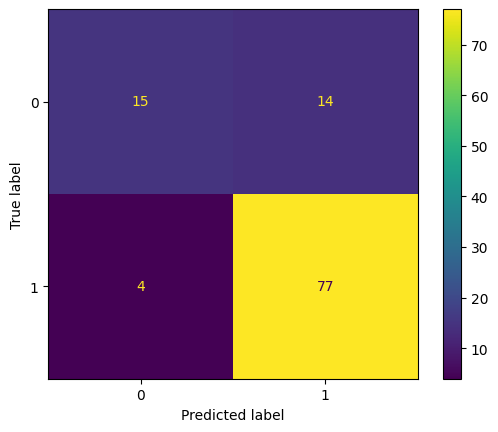

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.85      0.95      0.90        81

    accuracy                           0.84       110
   macro avg       0.82      0.73      0.76       110
weighted avg       0.83      0.84      0.82       110

Confusion Matrix for  DecisionTreeClassifier()


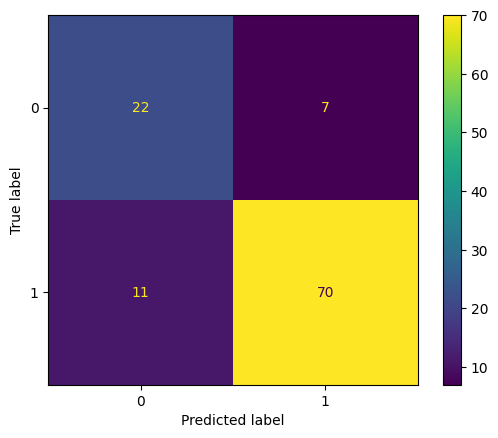

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        29
           1       0.91      0.86      0.89        81

    accuracy                           0.84       110
   macro avg       0.79      0.81      0.80       110
weighted avg       0.85      0.84      0.84       110

Confusion Matrix for  RandomForestClassifier()


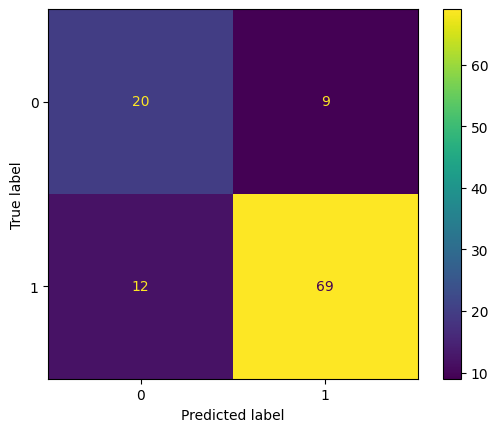

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.66        29
           1       0.88      0.85      0.87        81

    accuracy                           0.81       110
   macro avg       0.75      0.77      0.76       110
weighted avg       0.82      0.81      0.81       110

Confusion Matrix for  SVC()


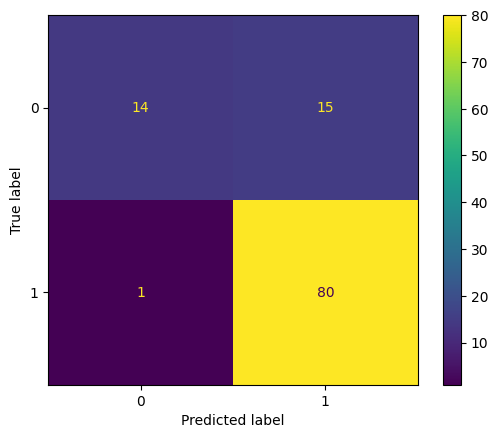

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.48      0.64        29
           1       0.84      0.99      0.91        81

    accuracy                           0.85       110
   macro avg       0.89      0.74      0.77       110
weighted avg       0.87      0.85      0.84       110

Confusion Matrix for  KNeighborsClassifier()


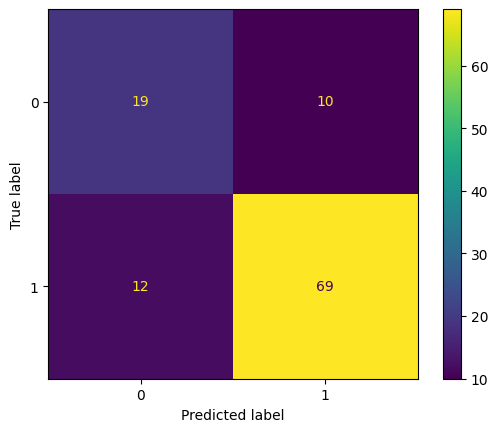

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.63        29
           1       0.87      0.85      0.86        81

    accuracy                           0.80       110
   macro avg       0.74      0.75      0.75       110
weighted avg       0.80      0.80      0.80       110

Confusion Matrix for  MultinomialNB()


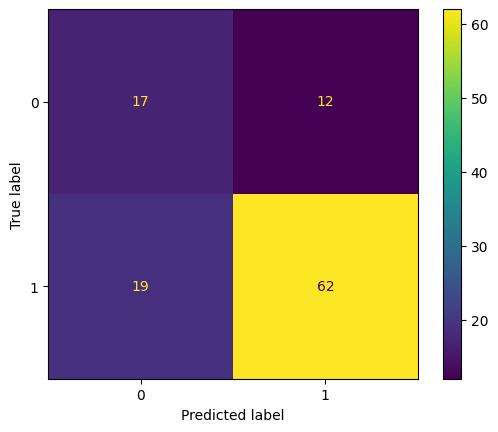

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.59      0.52        29
           1       0.84      0.77      0.80        81

    accuracy                           0.72       110
   macro avg       0.66      0.68      0.66       110
weighted avg       0.74      0.72      0.73       110

Confusion Matrix for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None

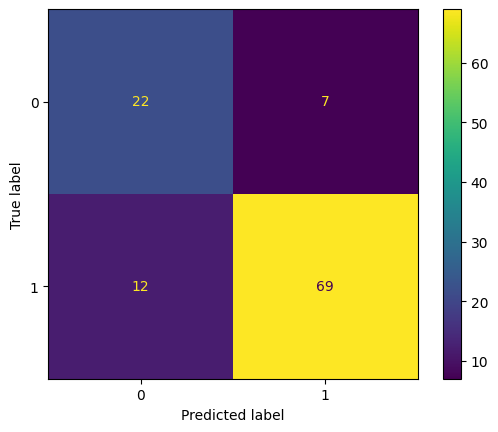

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70        29
           1       0.91      0.85      0.88        81

    accuracy                           0.83       110
   macro avg       0.78      0.81      0.79       110
weighted avg       0.84      0.83      0.83       110



In [33]:
classifier = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), MultinomialNB(), xgb.XGBClassifier()]

for clf in classifier:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
  print('Confusion Matrix for ', clf)
  cm.plot()
  plt.show(cm)
  print("Classification Report:\n", classification_report(y_test, y_pred))

In [34]:
for clf in classifier:
  print("Accuracy for ", clf)
  print(accuracy_score(y_test, clf.predict(X_test)))

Accuracy for  LogisticRegression()
0.8363636363636363
Accuracy for  DecisionTreeClassifier()
0.8363636363636363
Accuracy for  RandomForestClassifier()
0.8090909090909091
Accuracy for  SVC()
0.8545454545454545
Accuracy for  KNeighborsClassifier()
0.8
Accuracy for  MultinomialNB()
0.7181818181818181
Accuracy for  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_

# Model Tuning and Evaluation

In [35]:
#Hyperparameter tuning of logistic regression
log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 20,30],
'solver': ['newton-cg', 'lbfgs', 'liblinear']}

cv = StratifiedKFold(n_splits=5)
gs_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=cv)
gs_log_reg.fit(X_train, y_train)
log_reg_best = gs_log_reg.best_estimator_
print(log_reg_best)

LogisticRegression(C=20, solver='liblinear')


In [36]:
#Hyperparameter tuning of Multinominal Naive Bayes
mnb_params = {'alpha': [0.1, 1.0, 10.0],
              'fit_prior': [True, False]}

cv = StratifiedKFold(n_splits=5)
gs_mnb = GridSearchCV(MultinomialNB(), mnb_params, cv=cv)
gs_mnb.fit(X_train, y_train)
mnb_best = gs_mnb.best_estimator_
print(mnb_best)

MultinomialNB(alpha=10.0)


In [37]:
#Hyperparameter tuning of K Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 9, 11,13,17,19,20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

cv = StratifiedKFold(n_splits=5)
gs_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=cv)
gs_knn.fit(X_train, y_train)
knn_best = gs_knn.best_estimator_
print(knn_best)

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')


In [38]:
#Hyperparameter tuning of Decision Tree
dt_params = {'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'max_features': ['sqrt']}

cv = StratifiedKFold(n_splits=5)
gs_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=cv)
gs_dt.fit(X_train, y_train)
dt_best = gs_dt.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=5)


In [39]:
#Hyperparameter tuning of Random Forest
rf_params = {'n_estimators': [100, 200, 500],
'max_features': ['sqrt'],
'max_depth': [4, 8, 12]}

cv = StratifiedKFold(n_splits=5)
gs_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=cv)
gs_rf.fit(X_train, y_train)
rf_best = gs_rf.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=12, n_estimators=500)


In [40]:
#Hyperparameter tuning of SVM
svm_params = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf']}

cv = StratifiedKFold(n_splits=5)
gs_svm = GridSearchCV(SVC(), svm_params, cv=cv)
gs_svm.fit(X_train, y_train)
svm_best = gs_svm.best_estimator_
print(svm_best)

SVC(C=10, gamma=0.001, kernel='linear')


In [41]:
#Hyperparameter tuning of XGBoost
  xgb_params = {'max_depth': [3, 5, 7],
      'learning_rate': [0.01, 0.1],
      'n_estimators': [100, 200]}

cv = StratifiedKFold(n_splits=5)
gs_xgb = GridSearchCV(xgb.XGBClassifier(), xgb_params, cv=cv)
gs_xgb.fit(X_train, y_train)
xgb_best = gs_xgb.best_estimator_
print(xgb_best)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Confusion Matrix for tuned  LogisticRegression(C=20, solver='liblinear')


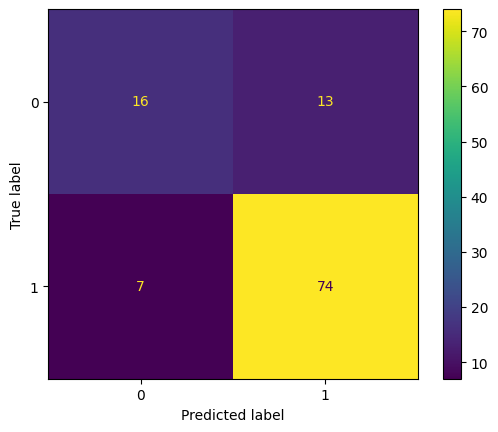

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62        29
           1       0.85      0.91      0.88        81

    accuracy                           0.82       110
   macro avg       0.77      0.73      0.75       110
weighted avg       0.81      0.82      0.81       110

Confusion Matrix for tuned  DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=5)


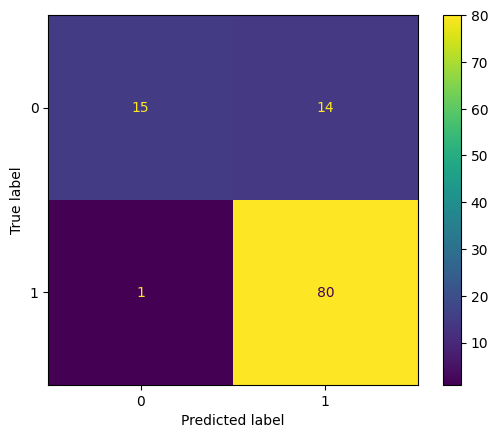

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.52      0.67        29
           1       0.85      0.99      0.91        81

    accuracy                           0.86       110
   macro avg       0.89      0.75      0.79       110
weighted avg       0.87      0.86      0.85       110

Confusion Matrix for tuned  RandomForestClassifier(max_depth=12, n_estimators=500)


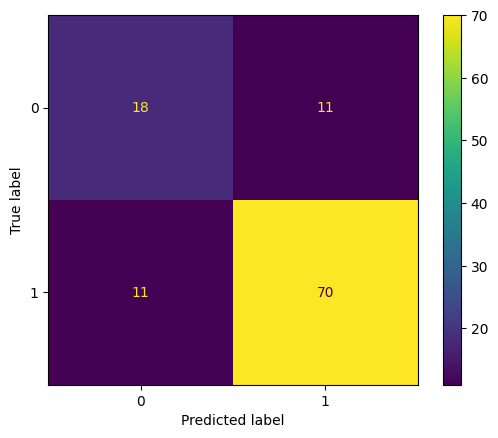

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62        29
           1       0.86      0.86      0.86        81

    accuracy                           0.80       110
   macro avg       0.74      0.74      0.74       110
weighted avg       0.80      0.80      0.80       110

Confusion Matrix for tuned  SVC(C=10, gamma=0.001, kernel='linear')


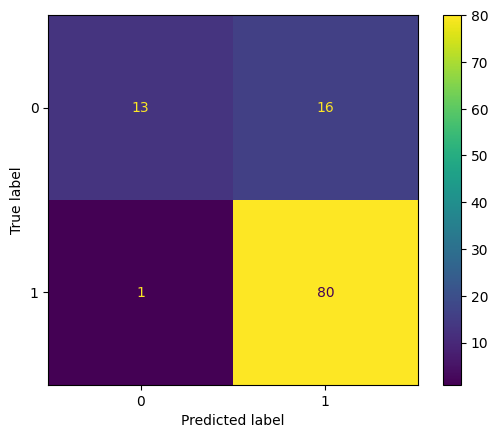

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.45      0.60        29
           1       0.83      0.99      0.90        81

    accuracy                           0.85       110
   macro avg       0.88      0.72      0.75       110
weighted avg       0.86      0.85      0.83       110

Confusion Matrix for tuned  KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')


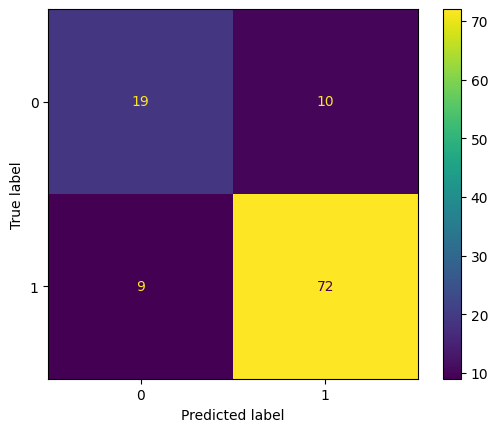

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67        29
           1       0.88      0.89      0.88        81

    accuracy                           0.83       110
   macro avg       0.78      0.77      0.78       110
weighted avg       0.83      0.83      0.83       110

Confusion Matrix for tuned  MultinomialNB(alpha=10.0)


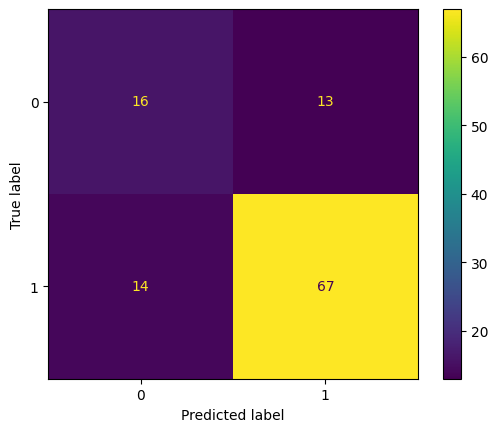

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.55      0.54        29
           1       0.84      0.83      0.83        81

    accuracy                           0.75       110
   macro avg       0.69      0.69      0.69       110
weighted avg       0.76      0.75      0.76       110

Confusion Matrix for tuned  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=No

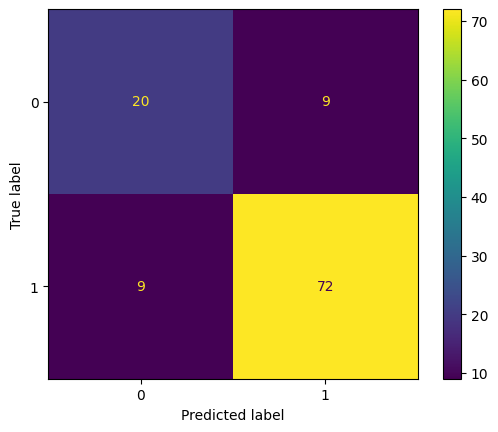

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        29
           1       0.89      0.89      0.89        81

    accuracy                           0.84       110
   macro avg       0.79      0.79      0.79       110
weighted avg       0.84      0.84      0.84       110



In [42]:
classifier = [log_reg_best, dt_best, rf_best, svm_best, knn_best, mnb_best, xgb_best]

for clf in classifier:
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
  print('Confusion Matrix for tuned ', clf)
  cm.plot()
  plt.show(cm)
  print("Classification Report:\n", classification_report(y_test, y_pred))

In [43]:
for clf in classifier:
  print("Accuracy for tuned ", clf)
  print(accuracy_score(y_test, clf.predict(X_test)))


Accuracy for tuned  LogisticRegression(C=20, solver='liblinear')
0.8181818181818182
Accuracy for tuned  DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=5)
0.8636363636363636
Accuracy for tuned  RandomForestClassifier(max_depth=12, n_estimators=500)
0.8
Accuracy for tuned  SVC(C=10, gamma=0.001, kernel='linear')
0.8454545454545455
Accuracy for tuned  KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')
0.8272727272727273
Accuracy for tuned  MultinomialNB(alpha=10.0)
0.7545454545454545
Accuracy for tuned  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_c